# 도전! 데이터 분석
## 기초 통계량과 데이터 시각화를 통한 인사이트 도출 실습 과정입니다.

* 먼저, 데이터를 불러와서 구조와 변수를 확인하겠습니다.
    * 제주도 내 상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터
    * 음면동, 업종명, 이용금액, 거주인구 등 정보 제공
    * 2019년 : raw_data/제주특별자치도_주제3_상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용_매쉬업결과_19.csv
    * 2020년 : raw_data/제주특별자치도_주제3_상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용_매쉬업결과_20(수정).csv
    * 2021년(1월_5월): raw_data/제주특별자치도_주제3_상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용_매쉬업결과_(2101~2105).csv

#### 1. 2019년 데이터 불러오기 및 데이터 클랜징
* 데이터 클랜징에는 1) 결측치 처리 2) 이상치 탐지와 처리 3) 중복 데이터 처리 4) 노이즈 처리 5) 형식 표준화 6) 데이터 일치성 검사(key값 확인) 7) 데이터 유효성 검사(range)가 있으나,
* 여기서는 결측치 처리, 이상치 탐지와 처리, 중복 데이터 처리를 중심으로 살펴보겠습니다.

In [1]:
# 필요한 라이브러리 Import
import pandas as pd

# 데이터 불러오기
df_2019 = pd.read_csv('raw_data/제주특별자치도_주제3_상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용_매쉬업결과_19.csv', encoding = 'cp949')

In [2]:
# 1. 결측치 확인 및 처리
missing_values = df_2019.isnull().sum()
print(missing_values)

년월         0
시도명        0
읍면동명       0
업종명        0
성별         0
이용자수       0
이용금액       0
거주인구       0
근무인구       0
방문인구       0
데이터기준일자    0
dtype: int64


In [4]:
# 결측치 리스트 출력
print("결측치:")
df_2019[df_2019.isnull().any(axis=1)]

결측치:


,년월,시도명,읍면동명,업종명,성별,이용자수,이용금액,거주인구,근무인구,방문인구,데이터기준일자


In [5]:
# 결측치가 있다면 제거
# 결측치 제거
df_2019 = df_2019.dropna()

# 인덱스 리셋
df_2019 = df_2019.reset_index(drop=True)

# 결측치 제거 결과 확인
print("결측치 제거 결과:")
df_2019

결측치 제거 결과:


,년월,시도명,읍면동명,업종명,성별,이용자수,이용금액,거주인구,근무인구,방문인구,데이터기준일자
0,2019-01-01,제주시,화북동,과실 및 채소 소매업,여성,155,11202300,9078626.288,539749.963,2866049.927,2020-12-15
1,2019-01-01,제주시,화북동,비알콜 음료점업,여성,1184,9674400,9078626.288,539749.963,2866049.927,2020-12-15
2,2019-01-01,제주시,화북동,기타 외국식 음식점업,여성,412,14592800,9078626.288,539749.963,2866049.927,2020-12-15
3,2019-01-01,제주시,화북동,기타 대형 종합 소매업,여성,4176,168038410,9078626.288,539749.963,2866049.927,2020-12-15
4,2019-01-01,제주시,화북동,관광 민예품 및 선물용품 소매업,여성,99,7165200,9078626.288,539749.963,2866049.927,2020-12-15
...,...,...,...,...,...,...,...,...,...,...,...
27411,2019-12-01,제주시,화북동,한식 음식점업,여성,5163,170629710,7706780.511,895520.731,3674034.647,2020-12-15
27412,2019-12-01,제주시,화북동,화장품 및 방향제 소매업,여성,187,14738370,7706780.511,895520.731,3674034.647,2020-12-15
27413,2019-12-01,제주시,봉개동,한식 음식점업,남성,2046,62019240,1461151.063,489270.669,1861857.723,2020-12-15
27414,2019-12-01,제주시,화북동,차량용 가스 충전업,여성,367,14734053,7706780.511,895520.731,3674034.647,2020-12-15


#### 여기서 잠깐!
* 시각화 이전에 한글을 인식하도록 설정을 하겠습니다.

In [6]:
# 컴퓨터 내 설치된 폰트 확인하기
## 라이브러리 Import
from matplotlib import font_manager

## 설치된 폰트 목록 가져오기
font_list = font_manager.fontManager.ttflist

## 폰트 이름 출력
for font in font_list:
    print(font.name)

STIXNonUnicode
cmss10
STIXGeneral
STIXGeneral
DejaVu Sans
STIXNonUnicode
STIXSizeThreeSym
STIXGeneral
STIXNonUnicode
cmex10
STIXNonUnicode
STIXSizeOneSym
DejaVu Sans
cmmi10
STIXSizeOneSym
DejaVu Sans
DejaVu Serif
cmb10
cmtt10
cmr10
cmsy10
STIXSizeFourSym
DejaVu Sans Mono
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Serif
DejaVu Sans Mono
STIXSizeTwoSym
DejaVu Serif
STIXSizeTwoSym
DejaVu Sans
STIXSizeFiveSym
DejaVu Serif
DejaVu Serif Display
STIXSizeFourSym
STIXGeneral
STIXSizeThreeSym
Tahoma
AppleGothic
SignPainter
Corsiva Hebrew
Noto Sans Elbasan
Kannada Sangam MN
Noto Sans Sundanese
Noto Sans Syriac
Iowan Old Style
Noto Sans Old South Arabian
Apple Symbols
Noto Sans Imperial Aramaic
Arial
Noto Sans Old Turkic
Noto Sans Buginese
Marion
Geeza Pro
Avenir
Hiragino Sans
Noto Sans Kayah Li
Hiragino Sans
Noto Sans Thaana
ITF Devanagari
Apple Braille
Hiragino Sans GB
Cochin
Sinhala MN
Chalkduster
Al Bayan
Charter
Heiti TC
.SF NS Mono
Mishafi Gold
Rockwell
Noto Sans Oriya
STIX

In [10]:
## 한글폰트 설정
import matplotlib.pyplot as plt

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.p

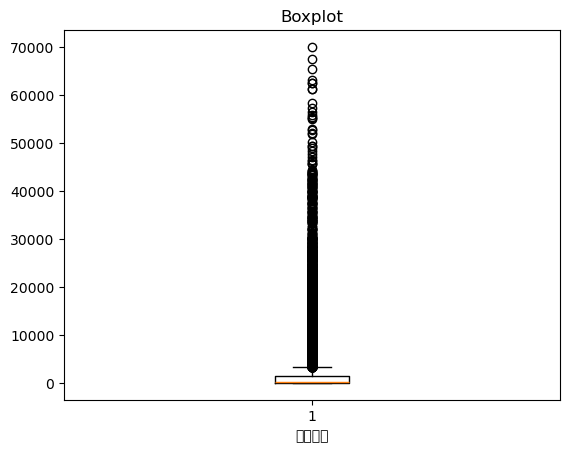

In [11]:
# 2. 이상치 탐지(boxplot으로)
## 이용자수
import pandas as pd
import matplotlib.pyplot as plt

# Boxplot 시각화
plt.boxplot(df_2019['이용자수'])
plt.title('Boxplot')
plt.xlabel('이용자수')
plt.show()

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py

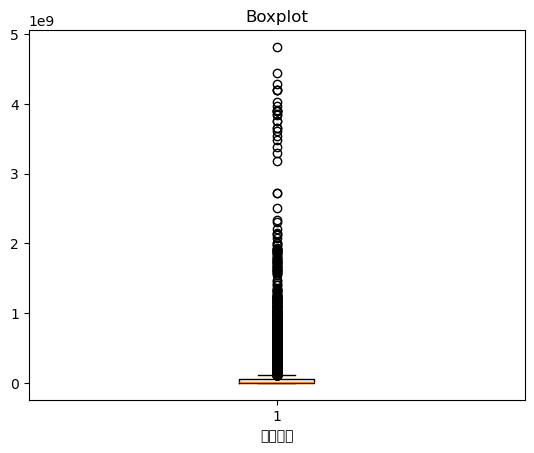

In [12]:
# 2. 이상치 탐지(boxplot으로)
## 이용금액
import pandas as pd
import matplotlib.pyplot as plt

# Boxplot 시각화
plt.boxplot(df_2019['이용금액'])
plt.title('Boxplot')
plt.xlabel('이용금액')
plt.show()

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.p

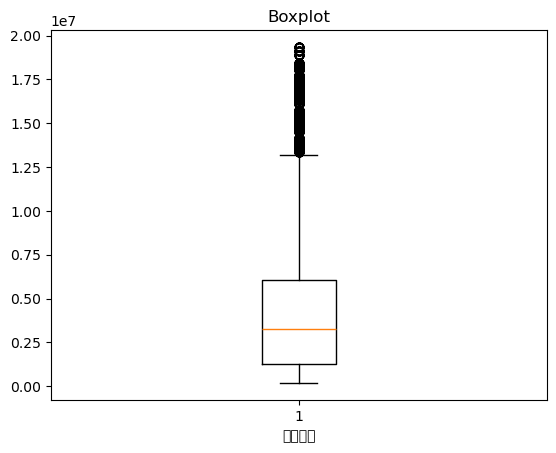

In [13]:
# 2. 이상치 탐지(boxplot으로)
## 거주인구
import pandas as pd
import matplotlib.pyplot as plt

# Boxplot 시각화
plt.boxplot(df_2019['거주인구'])
plt.title('Boxplot')
plt.xlabel('거주인구')
plt.show()

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  fig.canvas.

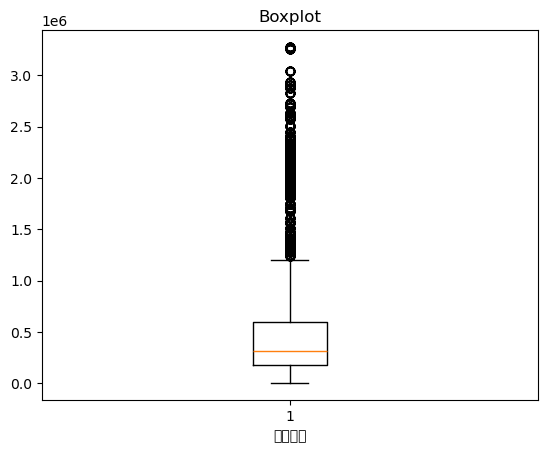

In [14]:
# 2. 이상치 탐지(boxplot으로)
## 근무인구
import pandas as pd
import matplotlib.pyplot as plt

# Boxplot 시각화
plt.boxplot(df_2019['근무인구'])
plt.title('Boxplot')
plt.xlabel('근무인구')
plt.show()

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/

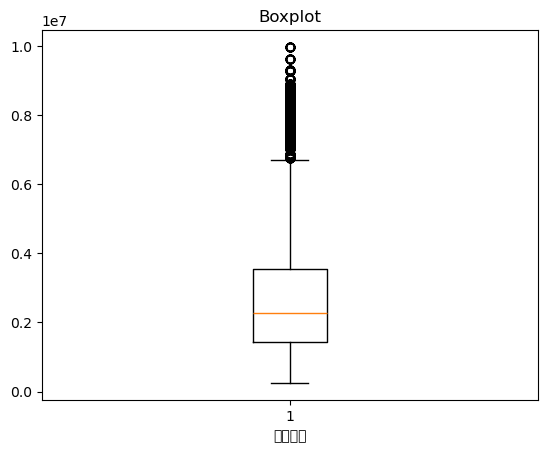

In [18]:
# 2. 이상치 탐지(boxplot으로)
## 방문인구
import pandas as pd
import matplotlib.pyplot as plt

# Boxplot 시각화
plt.boxplot(df_2019['방문인구'])
plt.title('Boxplot')
plt.xlabel('방문인구')
plt.show()

#### 한 번에 다 확인하는 방법은 없을까요?

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py

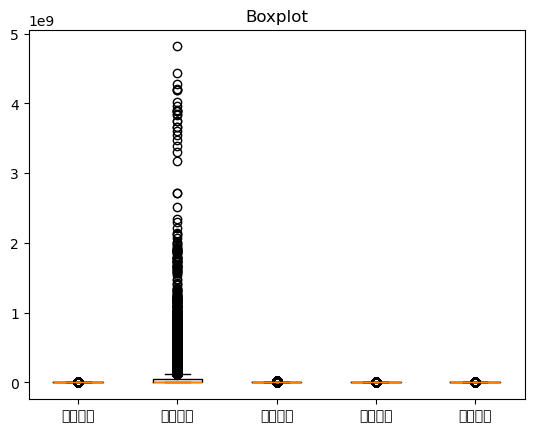

In [17]:
# 2. 이상치 탐지(boxplot으로)
## 이용자수, 이용금액, 거주인구, 근무인구, 방문인구
import pandas as pd
import matplotlib.pyplot as plt

# Boxplot 시각화
plt.boxplot(df_2019[['이용자수', '이용금액', '거주인구', '근무인구', '방문인구']])
plt.title('Boxplot')
plt.xticks(range(1, 6),['이용자수', '이용금액', '거주인구', '근무인구', '방문인구'])
plt.show()

#### boxplot에서 확인된 이상치 리스트 확인하기

In [ ]:
# 2. 이상치 탐지(tukey 방법으로)
## 라이브러리 Import
import pandas as pd
import numpy as np


# Tukey의 방법을 사용하여 이상치 식별 함수
def detect_outliers_tukey(data, variable):
    Q1 = np.percentile(data[variable], 25)
    Q3 = np.percentile(data[variable], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[variable] < lower_bound) | (data[variable] > upper_bound)]
    return outliers

In [ ]:
# '이용자수'에서 이상치 식별
outliers = detect_outliers_tukey(df_2019, '이용자수')
print("이상치:")
outliers

In [ ]:
# '이용금액'에서 이상치 식별
outliers = detect_outliers_tukey(df_2019, '이용금액')
print("이상치:")
outliers

In [ ]:
# '거주인구'에서 이상치 식별
outliers = detect_outliers_tukey(df_2019, '거주인구')
print("이상치:")
outliers

In [ ]:
# '근무인구'에서 이상치 식별
outliers = detect_outliers_tukey(df_2019, '근무인구')
print("이상치:")
outliers

In [ ]:
# '방문인구'에서 이상치 식별
outliers = detect_outliers_tukey(df_2019, '방문인구')
print("이상치:")
outliers

In [ ]:
# 3. 중복 데이터 확인
duplicates = df_2019[df_2019.duplicated()]

# 중복 데이터 출력
print("중복 데이터:")
print(duplicates)

In [ ]:
# 만약에 중복 값이 있다면, 삭제
df_2019_unique = df_2019.drop_duplicates()

# 중복 데이터 처리 결과 확인
print("중복 데이터 처리 결과:")
df_2019_unique

#### 2. 2020년 데이터 불러오기 불러오기 및 데이터 클랜징(실습)
* 2020년 : raw_data/제주특별자치도_주제3_상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용_매쉬업결과_20(수정).csv

In [20]:
# 필요한 라이브러리 Import
import pandas as pd

# 데이터 불러오기
df_2020 = pd.read_csv('raw_data/제주특별자치도_주제3_상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용_매쉬업결과_20(수정).csv', encoding = 'cp949')

In [21]:
# 1. 결측치 확인 및 처리
missing_values = df_2020.isnull().sum()
print(missing_values)

년월         0
시도명        0
읍면동명       0
업종명        0
성별         0
이용자수       0
이용금액       0
거주인구       0
근무인구       0
방문인구       0
데이터기준일자    0
dtype: int64


In [22]:
# 결측치 리스트 출력
print("결측치:")
df_2020[df_2020.isnull().any(axis=1)]

결측치:


,년월,시도명,읍면동명,업종명,성별,이용자수,이용금액,거주인구,근무인구,방문인구,데이터기준일자


In [24]:
# 결측치가 있다면 제거
# 결측치 제거
df_2020 = df_2020.dropna()

# 인덱스 리셋
df_2020 = df_2020.reset_index(drop=True)

# 결측치 제거 결과 확인
print("결측치 제거 결과:")
df_2020

결측치 제거 결과:


,년월,시도명,읍면동명,업종명,성별,이용자수,이용금액,거주인구,근무인구,방문인구,데이터기준일자
0,2020-01-01,서귀포시,남원읍,골프장 운영업,남성,1980,297727940,4.869067e+06,444319.725,3304302.997,2020-12-15
1,2020-01-01,제주시,외도동,수산물 소매업,남성,75,4657000,3.651449e+06,197093.412,1837113.079,2020-12-15
2,2020-01-01,제주시,오라동,중식 음식점업,남성,283,9340000,4.759442e+06,595571.433,4993516.699,2020-12-15
3,2020-01-01,제주시,오라동,자동차 임대업,남성,293,16523986,4.759442e+06,595571.433,4993516.699,2020-12-15
4,2020-01-01,제주시,오라동,스포츠 및 레크레이션 용품 임대업,남성,407,37918500,4.759442e+06,595571.433,4993516.699,2020-12-15
...,...,...,...,...,...,...,...,...,...,...,...
26933,2020-12-01,서귀포시,천지동,건강보조식품 소매업,남성,31,4654100,3.266401e+05,36434.368,629487.114,2021-07-26
26934,2020-12-01,서귀포시,천지동,건강보조식품 소매업,여성,25,3073660,2.702654e+05,28777.808,551171.003,2021-07-26
26935,2020-12-01,서귀포시,천지동,과실 및 채소 소매업,남성,2561,93739250,3.266401e+05,36434.368,629487.114,2021-07-26
26936,2020-12-01,서귀포시,천지동,과실 및 채소 소매업,여성,2342,77394645,2.702654e+05,28777.808,551171.003,2021-07-26


#### 여기서 잠깐!
* 시각화 이전에 한글을 인식하도록 설정을 하겠습니다.

In [25]:
# 컴퓨터 내 설치된 폰트 확인하기
## 라이브러리 Import
from matplotlib import font_manager

## 설치된 폰트 목록 가져오기
font_list = font_manager.fontManager.ttflist

## 폰트 이름 출력
for font in font_list:
    print(font.name)

STIXNonUnicode
cmss10
STIXGeneral
STIXGeneral
DejaVu Sans
STIXNonUnicode
STIXSizeThreeSym
STIXGeneral
STIXNonUnicode
cmex10
STIXNonUnicode
STIXSizeOneSym
DejaVu Sans
cmmi10
STIXSizeOneSym
DejaVu Sans
DejaVu Serif
cmb10
cmtt10
cmr10
cmsy10
STIXSizeFourSym
DejaVu Sans Mono
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Serif
DejaVu Sans Mono
STIXSizeTwoSym
DejaVu Serif
STIXSizeTwoSym
DejaVu Sans
STIXSizeFiveSym
DejaVu Serif
DejaVu Serif Display
STIXSizeFourSym
STIXGeneral
STIXSizeThreeSym
Tahoma
AppleGothic
SignPainter
Corsiva Hebrew
Noto Sans Elbasan
Kannada Sangam MN
Noto Sans Sundanese
Noto Sans Syriac
Iowan Old Style
Noto Sans Old South Arabian
Apple Symbols
Noto Sans Imperial Aramaic
Arial
Noto Sans Old Turkic
Noto Sans Buginese
Marion
Geeza Pro
Avenir
Hiragino Sans
Noto Sans Kayah Li
Hiragino Sans
Noto Sans Thaana
ITF Devanagari
Apple Braille
Hiragino Sans GB
Cochin
Sinhala MN
Chalkduster
Al Bayan
Charter
Heiti TC
.SF NS Mono
Mishafi Gold
Rockwell
Noto Sans Oriya
STIX

In [27]:
## 한글폰트 설정
import matplotlib.pyplot as plt

# 폰트 설정
plt.rcParams['font.family'] = 'Arial'

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


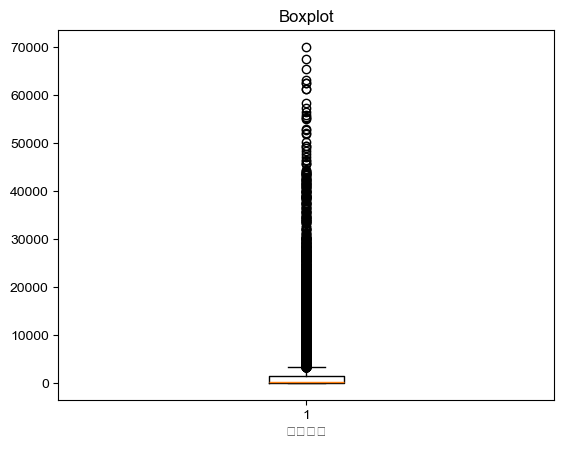

In [28]:
# 2. 이상치 탐지(boxplot으로)
## 이용자수
import pandas as pd
import matplotlib.pyplot as plt

# Boxplot 시각화
plt.boxplot(df_2019['이용자수'])
plt.title('Boxplot')
plt.xlabel('이용자수')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


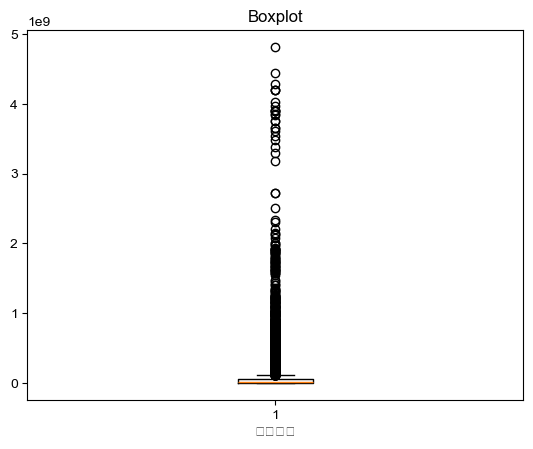

In [29]:
# 2. 이상치 탐지(boxplot으로)
## 이용금액
import pandas as pd
import matplotlib.pyplot as plt

# Boxplot 시각화
plt.boxplot(df_2019['이용금액'])
plt.title('Boxplot')
plt.xlabel('이용금액')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


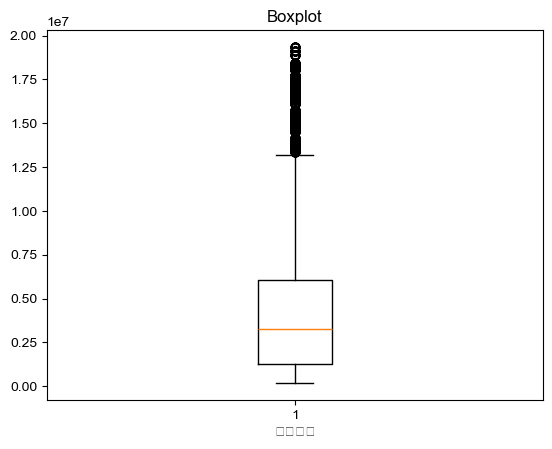

In [30]:
# 2. 이상치 탐지(boxplot으로)
# 2. 이상치 탐지(boxplot으로)
## 거주인구
import pandas as pd
import matplotlib.pyplot as plt

# Boxplot 시각화
plt.boxplot(df_2019['거주인구'])
plt.title('Boxplot')
plt.xlabel('거주인구')
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


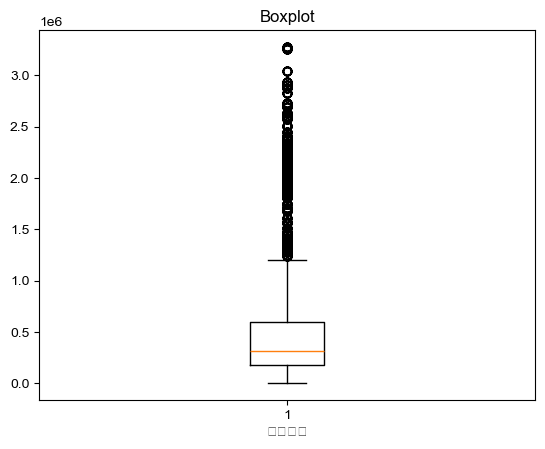

In [31]:
# 2. 이상치 탐지(boxplot으로)
## 근무인구
import pandas as pd
import matplotlib.pyplot as plt

# Boxplot 시각화
plt.boxplot(df_2019['근무인구'])
plt.title('Boxplot')
plt.xlabel('근무인구')
plt.show()



/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


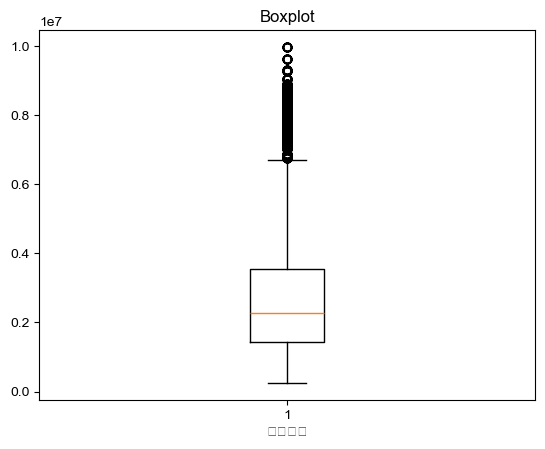

In [32]:
# 2. 이상치 탐지(boxplot으로)
## 방문인구
import pandas as pd
import matplotlib.pyplot as plt

# Boxplot 시각화
plt.boxplot(df_2019['방문인구'])
plt.title('Boxplot')
plt.xlabel('방문인구')
plt.show()


#### 한 번에 다 확인하는 방법은 없을까요?

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/pyt

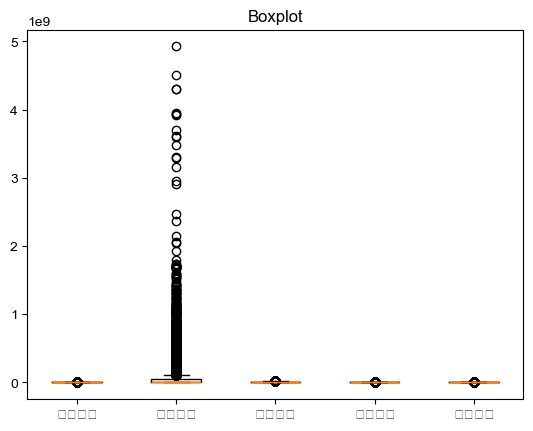

In [34]:
# 2. 이상치 탐지(boxplot으로)
## 이용자수, 이용금액, 거주인구, 근무인구, 방문인구
import pandas as pd
import matplotlib.pyplot as plt

# Boxplot 시각화
plt.boxplot(df_2020[['이용자수', '이용금액', '거주인구', '근무인구', '방문인구']])
plt.title('Boxplot')
plt.xticks(range(1, 6),['이용자수', '이용금액', '거주인구', '근무인구', '방문인구'])
plt.show()



#### boxplot에서 확인된 이상치 리스트 확인하기

In [41]:
# 2. 이상치 탐지(tukey 방법으로)
## 라이브러리 Import
import pandas as pd
import numpy as np

# Tukey의 방법을 사용하여 이상치 식별 함수
def detect_outliers_tukey(data, variable):
    Q1 = np.percentile(data[variable], 25)
    Q3 = np.percentile(data[variable], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[variable] < lower_bound) | (data[variable] > upper_bound)]
    return outliers

In [42]:
# '이용자수'에서 이상치 식별
outliers = detect_outliers_tukey(df_2020, '이용자수')
print("이상치:")
outliers

이상치:


,년월,시도명,읍면동명,업종명,성별,이용자수,이용금액,거주인구,근무인구,방문인구,데이터기준일자
5,2020-01-01,제주시,오라동,한식 음식점업,남성,9694,285666860,4.759442e+06,595571.433,4993516.699,2020-12-15
6,2020-01-01,제주시,오라동,체인화 편의점,남성,8210,68812010,4.759442e+06,595571.433,4993516.699,2020-12-15
7,2020-01-01,제주시,오라동,차량용 주유소 운영업,남성,6245,315006743,4.759442e+06,595571.433,4993516.699,2020-12-15
17,2020-01-01,제주시,오라동,슈퍼마켓,남성,5076,145916624,4.759442e+06,595571.433,4993516.699,2020-12-15
19,2020-01-01,제주시,연동,한식 음식점업,여성,22668,881158445,1.559666e+07,1862889.878,7404723.053,2020-12-15
...,...,...,...,...,...,...,...,...,...,...,...
26917,2020-12-01,서귀포시,천지동,빵 및 과자류 소매업,여성,3303,51453960,2.702654e+05,28777.808,551171.003,2021-07-26
26923,2020-12-01,서귀포시,중앙동,체인화 편의점,남성,19636,205171870,5.841170e+05,262330.065,1449981.541,2021-07-26
26924,2020-12-01,서귀포시,중앙동,체인화 편의점,여성,10996,127603280,8.046966e+05,187220.709,1635741.862,2021-07-26
26927,2020-12-01,서귀포시,중앙동,한식 음식점업,남성,13203,519773188,5.841170e+05,262330.065,1449981.541,2021-07-26


In [43]:
# '이용금액'에서 이상치 식별
outliers = detect_outliers_tukey(df_2020, '이용금액')
print("이상치:")
outliers


이상치:


,년월,시도명,읍면동명,업종명,성별,이용자수,이용금액,거주인구,근무인구,방문인구,데이터기준일자
0,2020-01-01,서귀포시,남원읍,골프장 운영업,남성,1980,297727940,4.869067e+06,444319.725,3304302.997,2020-12-15
5,2020-01-01,제주시,오라동,한식 음식점업,남성,9694,285666860,4.759442e+06,595571.433,4993516.699,2020-12-15
7,2020-01-01,제주시,오라동,차량용 주유소 운영업,남성,6245,315006743,4.759442e+06,595571.433,4993516.699,2020-12-15
17,2020-01-01,제주시,오라동,슈퍼마켓,남성,5076,145916624,4.759442e+06,595571.433,4993516.699,2020-12-15
19,2020-01-01,제주시,연동,한식 음식점업,여성,22668,881158445,1.559666e+07,1862889.878,7404723.053,2020-12-15
...,...,...,...,...,...,...,...,...,...,...,...
26899,2020-12-01,서귀포시,중앙동,수산물 소매업,남성,1725,127741572,5.841170e+05,262330.065,1449981.541,2021-07-26
26923,2020-12-01,서귀포시,중앙동,체인화 편의점,남성,19636,205171870,5.841170e+05,262330.065,1449981.541,2021-07-26
26924,2020-12-01,서귀포시,중앙동,체인화 편의점,여성,10996,127603280,8.046966e+05,187220.709,1635741.862,2021-07-26
26927,2020-12-01,서귀포시,중앙동,한식 음식점업,남성,13203,519773188,5.841170e+05,262330.065,1449981.541,2021-07-26


In [44]:
# '거주인구'에서 이상치 식별
outliers = detect_outliers_tukey(df_2020, '거주인구')
print("이상치:")
outliers


이상치:


,년월,시도명,읍면동명,업종명,성별,이용자수,이용금액,거주인구,근무인구,방문인구,데이터기준일자
18,2020-01-01,제주시,연동,"피자, 햄버거, 샌드위치 및 유사 음식점업",여성,1441,19073980,15596659.07,1862889.878,7404723.053,2020-12-15
19,2020-01-01,제주시,연동,한식 음식점업,여성,22668,881158445,15596659.07,1862889.878,7404723.053,2020-12-15
20,2020-01-01,제주시,연동,호텔업,여성,838,161671771,15596659.07,1862889.878,7404723.053,2020-12-15
21,2020-01-01,제주시,연동,화장품 및 방향제 소매업,여성,1769,72961230,15596659.07,1862889.878,7404723.053,2020-12-15
33,2020-01-01,제주시,연동,체인화 편의점,여성,33130,310311302,15596659.07,1862889.878,7404723.053,2020-12-15
...,...,...,...,...,...,...,...,...,...,...,...
26653,2020-12-01,제주시,노형동,기타음식료품위주종합소매업,여성,5229,308289420,21639882.26,1893229.751,6233199.307,2021-07-26
26654,2020-12-01,제주시,노형동,마사지업,남성,2,200000,18924298.58,1951156.012,7086007.399,2021-07-26
26655,2020-12-01,제주시,노형동,마사지업,여성,1,130000,21639882.26,1893229.751,6233199.307,2021-07-26
26656,2020-12-01,제주시,노형동,비알콜 음료점업,남성,6090,51867670,18924298.58,1951156.012,7086007.399,2021-07-26


In [45]:
# '근무인구'에서 이상치 식별
outliers = detect_outliers_tukey(df_2020, '근무인구')
print("이상치:")
outliers

이상치:


,년월,시도명,읍면동명,업종명,성별,이용자수,이용금액,거주인구,근무인구,방문인구,데이터기준일자
18,2020-01-01,제주시,연동,"피자, 햄버거, 샌드위치 및 유사 음식점업",여성,1441,19073980,15596659.07,1862889.878,7404723.053,2020-12-15
19,2020-01-01,제주시,연동,한식 음식점업,여성,22668,881158445,15596659.07,1862889.878,7404723.053,2020-12-15
20,2020-01-01,제주시,연동,호텔업,여성,838,161671771,15596659.07,1862889.878,7404723.053,2020-12-15
21,2020-01-01,제주시,연동,화장품 및 방향제 소매업,여성,1769,72961230,15596659.07,1862889.878,7404723.053,2020-12-15
33,2020-01-01,제주시,연동,체인화 편의점,여성,33130,310311302,15596659.07,1862889.878,7404723.053,2020-12-15
...,...,...,...,...,...,...,...,...,...,...,...
26653,2020-12-01,제주시,노형동,기타음식료품위주종합소매업,여성,5229,308289420,21639882.26,1893229.751,6233199.307,2021-07-26
26654,2020-12-01,제주시,노형동,마사지업,남성,2,200000,18924298.58,1951156.012,7086007.399,2021-07-26
26655,2020-12-01,제주시,노형동,마사지업,여성,1,130000,21639882.26,1893229.751,6233199.307,2021-07-26
26656,2020-12-01,제주시,노형동,비알콜 음료점업,남성,6090,51867670,18924298.58,1951156.012,7086007.399,2021-07-26


In [46]:
# '방문인구'에서 이상치 식별
outliers = detect_outliers_tukey(df_2020, '방문인구')
print("이상치:")
outliers

이상치:


,년월,시도명,읍면동명,업종명,성별,이용자수,이용금액,거주인구,근무인구,방문인구,데이터기준일자
18,2020-01-01,제주시,연동,"피자, 햄버거, 샌드위치 및 유사 음식점업",여성,1441,19073980,15596659.07,1862889.878,7404723.053,2020-12-15
19,2020-01-01,제주시,연동,한식 음식점업,여성,22668,881158445,15596659.07,1862889.878,7404723.053,2020-12-15
20,2020-01-01,제주시,연동,호텔업,여성,838,161671771,15596659.07,1862889.878,7404723.053,2020-12-15
21,2020-01-01,제주시,연동,화장품 및 방향제 소매업,여성,1769,72961230,15596659.07,1862889.878,7404723.053,2020-12-15
33,2020-01-01,제주시,연동,체인화 편의점,여성,33130,310311302,15596659.07,1862889.878,7404723.053,2020-12-15
...,...,...,...,...,...,...,...,...,...,...,...
26648,2020-12-01,제주시,노형동,기타 외국식 음식점업,남성,982,24259350,18924298.58,1951156.012,7086007.399,2021-07-26
26650,2020-12-01,제주시,노형동,기타 주점업,남성,46,11310000,18924298.58,1951156.012,7086007.399,2021-07-26
26652,2020-12-01,제주시,노형동,기타음식료품위주종합소매업,남성,4804,285938840,18924298.58,1951156.012,7086007.399,2021-07-26
26654,2020-12-01,제주시,노형동,마사지업,남성,2,200000,18924298.58,1951156.012,7086007.399,2021-07-26


In [47]:
# 3. 중복 데이터 확인
duplicates = df_2020[df_2020.duplicated()]

# 중복 데이터 출력
print("중복 데이터:")
print(duplicates)


중복 데이터:
Empty DataFrame
Columns: [년월, 시도명, 읍면동명, 업종명, 성별, 이용자수, 이용금액, 거주인구, 근무인구, 방문인구, 데이터기준일자]
Index: []


In [48]:
# 만약에 중복 값이 있다면, 삭제
df_2020_unique = df_2020.drop_duplicates()

# 중복 데이터 처리 결과 확인
print("중복 데이터 처리 결과:")
df_2020_unique

중복 데이터 처리 결과:


,년월,시도명,읍면동명,업종명,성별,이용자수,이용금액,거주인구,근무인구,방문인구,데이터기준일자
0,2020-01-01,서귀포시,남원읍,골프장 운영업,남성,1980,297727940,4.869067e+06,444319.725,3304302.997,2020-12-15
1,2020-01-01,제주시,외도동,수산물 소매업,남성,75,4657000,3.651449e+06,197093.412,1837113.079,2020-12-15
2,2020-01-01,제주시,오라동,중식 음식점업,남성,283,9340000,4.759442e+06,595571.433,4993516.699,2020-12-15
3,2020-01-01,제주시,오라동,자동차 임대업,남성,293,16523986,4.759442e+06,595571.433,4993516.699,2020-12-15
4,2020-01-01,제주시,오라동,스포츠 및 레크레이션 용품 임대업,남성,407,37918500,4.759442e+06,595571.433,4993516.699,2020-12-15
...,...,...,...,...,...,...,...,...,...,...,...
26933,2020-12-01,서귀포시,천지동,건강보조식품 소매업,남성,31,4654100,3.266401e+05,36434.368,629487.114,2021-07-26
26934,2020-12-01,서귀포시,천지동,건강보조식품 소매업,여성,25,3073660,2.702654e+05,28777.808,551171.003,2021-07-26
26935,2020-12-01,서귀포시,천지동,과실 및 채소 소매업,남성,2561,93739250,3.266401e+05,36434.368,629487.114,2021-07-26
26936,2020-12-01,서귀포시,천지동,과실 및 채소 소매업,여성,2342,77394645,2.702654e+05,28777.808,551171.003,2021-07-26


#### 3. 2021년 데이터 불러오기 및 데이터 클랜징(실습)
* 2021년(1월_5월): raw_data/제주특별자치도_주제3_상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용_매쉬업결과_(2101~2105).csv

In [49]:
# 필요한 라이브러리 Import
import pandas as pd

# 데이터 불러오기
df_2021 = pd.read_csv('raw_data/제주특별자치도_주제3_상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용_매쉬업결과_(2101~2105).csv', encoding = 'cp949')

In [50]:
# 1. 결측치 확인 및 처리
missing_values = df_2021.isnull().sum()
print(missing_values)

년월            0
시도명           0
읍면동명          0
업종명           0
성별            0
이용자수          0
이용금액          0
거주인구       5439
근무인구       5439
방문인구       5439
데이터기준일자       0
dtype: int64


In [ ]:
# 결측치 리스트 출력
print("결측치:")
df_2021[df_2021.isnull().any(axis=1)]

In [51]:
# 결측치가 있다면 제거
# 결측치 제거
df_2021 = df_2021.dropna()

# 인덱스 리셋
df_2021 = df_2021.reset_index(drop=True)


# 결측치 제거 결과 확인
print("결측치 제거 결과:")
df_2021

결측치 제거 결과:


,년월,시도명,읍면동명,업종명,성별,이용자수,이용금액,거주인구,근무인구,방문인구,데이터기준일자
0,21-Apr,서귀포시,남원읍,건강보조식품 소매업,남성,1,154400,5259552.532,512354.824,2970022.771,2021-07-26
1,21-Apr,서귀포시,남원읍,건강보조식품 소매업,여성,3,1352200,4752881.281,346315.058,2592163.631,2021-07-26
2,21-Apr,서귀포시,남원읍,골프장 운영업,남성,2709,346127640,5259552.532,512354.824,2970022.771,2021-07-26
3,21-Apr,서귀포시,남원읍,골프장 운영업,여성,954,124275180,4752881.281,346315.058,2592163.631,2021-07-26
4,21-Apr,서귀포시,남원읍,과실 및 채소 소매업,남성,429,36537800,5259552.532,512354.824,2970022.771,2021-07-26
...,...,...,...,...,...,...,...,...,...,...,...
11038,21-May,제주시,화북동,차량용 주유소 운영업,여성,2522,124664691,9630583.912,583684.718,2865379.078,2021-07-26
11039,21-May,제주시,화북동,일식 음식점업,남성,116,7826620,9070944.899,929529.133,3285263.301,2021-07-26
11040,21-May,제주시,화북동,육류 소매업,여성,550,31141750,9630583.912,583684.718,2865379.078,2021-07-26
11041,21-May,제주시,화북동,일식 음식점업,여성,49,2574000,9630583.912,583684.718,2865379.078,2021-07-26


#### 여기서 잠깐!
* 시각화 이전에 한글을 인식하도록 설정을 하겠습니다.

In [52]:
# 컴퓨터 내 설치된 폰트 확인하기
## 라이브러리 Import
from matplotlib import font_manager

## 설치된 폰트 목록 가져오기
font_list = font_manager.fontManager.ttflist

## 폰트 이름 출력
for font in font_list:
    print(font.name)

STIXNonUnicode
cmss10
STIXGeneral
STIXGeneral
DejaVu Sans
STIXNonUnicode
STIXSizeThreeSym
STIXGeneral
STIXNonUnicode
cmex10
STIXNonUnicode
STIXSizeOneSym
DejaVu Sans
cmmi10
STIXSizeOneSym
DejaVu Sans
DejaVu Serif
cmb10
cmtt10
cmr10
cmsy10
STIXSizeFourSym
DejaVu Sans Mono
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Sans Mono
DejaVu Serif
DejaVu Sans Mono
STIXSizeTwoSym
DejaVu Serif
STIXSizeTwoSym
DejaVu Sans
STIXSizeFiveSym
DejaVu Serif
DejaVu Serif Display
STIXSizeFourSym
STIXGeneral
STIXSizeThreeSym
Tahoma
AppleGothic
SignPainter
Corsiva Hebrew
Noto Sans Elbasan
Kannada Sangam MN
Noto Sans Sundanese
Noto Sans Syriac
Iowan Old Style
Noto Sans Old South Arabian
Apple Symbols
Noto Sans Imperial Aramaic
Arial
Noto Sans Old Turkic
Noto Sans Buginese
Marion
Geeza Pro
Avenir
Hiragino Sans
Noto Sans Kayah Li
Hiragino Sans
Noto Sans Thaana
ITF Devanagari
Apple Braille
Hiragino Sans GB
Cochin
Sinhala MN
Chalkduster
Al Bayan
Charter
Heiti TC
.SF NS Mono
Mishafi Gold
Rockwell
Noto Sans Oriya
STIX

In [53]:
## 한글폰트 설정
import matplotlib.pyplot as plt

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/py

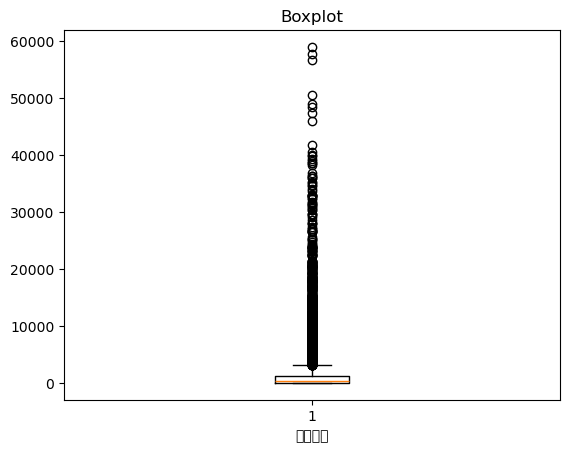

In [69]:
# 2. 이상치 탐지(boxplot으로)
## 이용자수
import pandas as pd
import matplotlib.pyplot as plt


# Boxplot 시각화
plt.boxplot(df_2021['이용자수'])
plt.title('Boxplot')
plt.xlabel('이용자수')
plt.show()



findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py

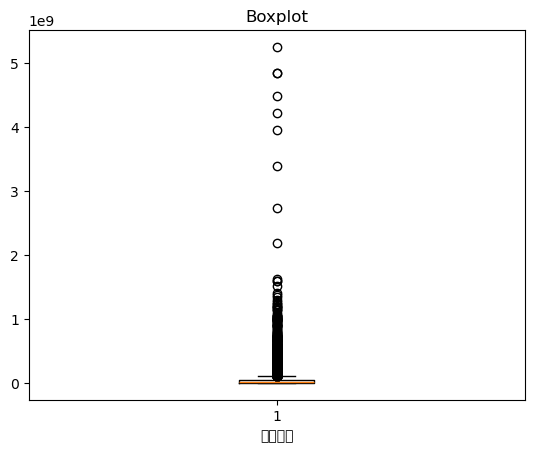

In [70]:
# 2. 이상치 탐지(boxplot으로)
## 이용금액
import pandas as pd
import matplotlib.pyplot as plt


# Boxplot 시각화
plt.boxplot(df_2021['이용금액'])
plt.title('Boxplot')
plt.xlabel('이용금액')
plt.show()


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py

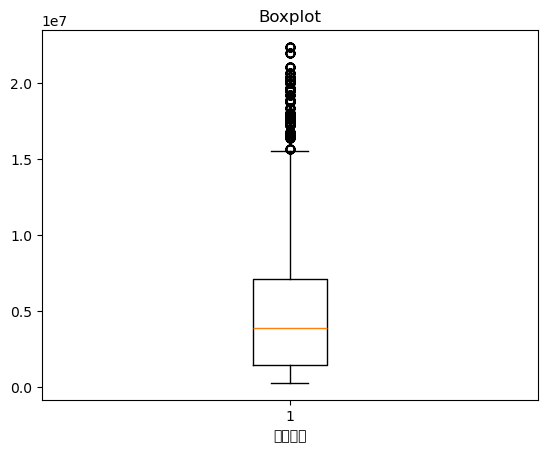

In [71]:
# 2. 이상치 탐지(boxplot으로)
## 거주인구
import pandas as pd
import matplotlib.pyplot as plt

# Boxplot 시각화
plt.boxplot(df_2021['거주인구'])
plt.title('Boxplot')
plt.xlabel('거주인구')
plt.show()


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/p

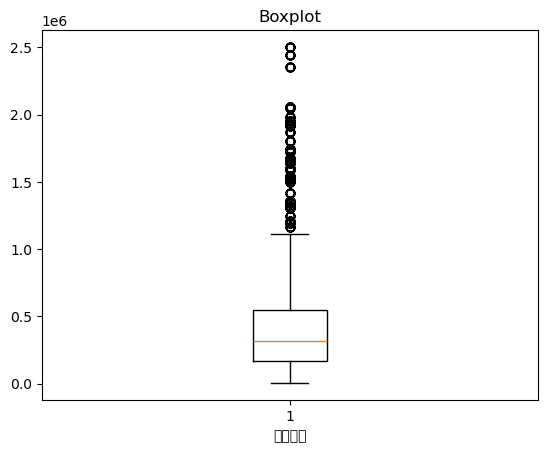

In [72]:
# 2. 이상치 탐지(boxplot으로)
## 근무인구
import pandas as pd
import matplotlib.pyplot as plt

# Boxplot 시각화
plt.boxplot(df_2021['근무인구'])
plt.title('Boxplot')
plt.xlabel('근무인구')
plt.show()


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.

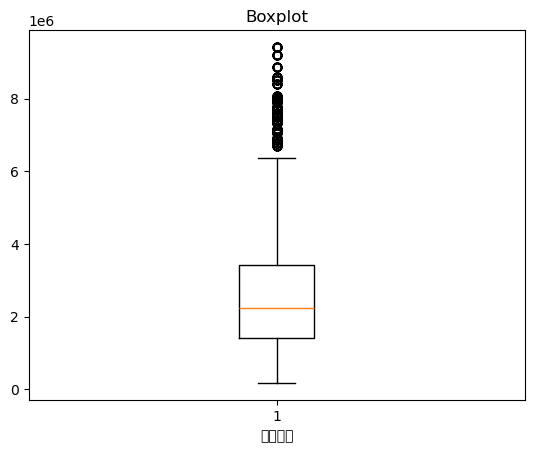

In [73]:
# 2. 이상치 탐지(boxplot으로)
## 방문인구
import pandas as pd
import matplotlib.pyplot as plt

# Boxplot 시각화
plt.boxplot(df_2021['방문인구'])
plt.title('Boxplot')
plt.xlabel('방문인구')
plt.show()



#### 한 번에 다 확인하는 방법은 없을까요?

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py

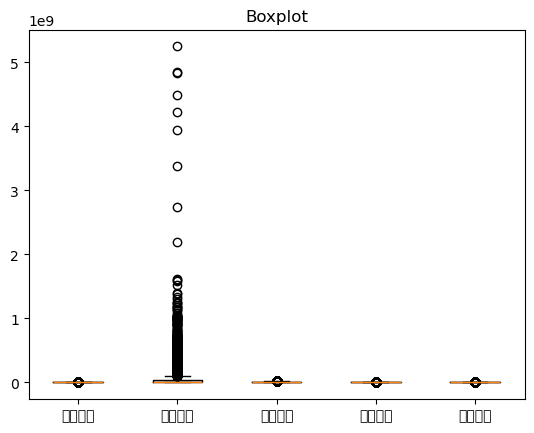

In [74]:
# 2. 이상치 탐지(boxplot으로)
## 이용자수, 이용금액, 거주인구, 근무인구, 방문인구
import pandas as pd
import matplotlib.pyplot as plt

# Boxplot 시각화
plt.boxplot(df_2021[['이용자수', '이용금액', '거주인구', '근무인구', '방문인구']])
plt.title('Boxplot')
plt.xticks(range(1, 6),['이용자수', '이용금액', '거주인구', '근무인구', '방문인구'])
plt.show()



#### boxplot에서 확인된 이상치 리스트 확인하기

In [75]:
# 2. 이상치 탐지(tukey 방법으로)
## 라이브러리 Import
import pandas as pd
import numpy as np

# Tukey의 방법을 사용하여 이상치 식별 함수
def detect_outliers_tukey(data, variable):
    Q1 = np.percentile(data[variable], 25)
    Q3 = np.percentile(data[variable], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[variable] < lower_bound) | (data[variable] > upper_bound)]
    return outliers

In [76]:
# '이용자수'에서 이상치 식별
outliers = detect_outliers_tukey(df_2021, '이용자수')
print("이상치:")
outliers


이상치:


,년월,시도명,읍면동명,업종명,성별,이용자수,이용금액,거주인구,근무인구,방문인구,데이터기준일자
14,21-Apr,서귀포시,남원읍,기타음식료품위주종합소매업,남성,4325,160365455,5259552.532,512354.824,2970022.771,2021-07-26
42,21-Apr,서귀포시,남원읍,차량용 주유소 운영업,남성,4769,213639389,5259552.532,512354.824,2970022.771,2021-07-26
44,21-Apr,서귀포시,남원읍,체인화 편의점,남성,8265,93957750,5259552.532,512354.824,2970022.771,2021-07-26
47,21-Apr,서귀포시,남원읍,체인화 편의점,여성,3628,38845600,4752881.281,346315.058,2592163.631,2021-07-26
61,21-Apr,서귀포시,대륜동,기타 대형 종합 소매업,남성,8283,516376960,4722673.487,510393.910,2814487.248,2021-07-26
...,...,...,...,...,...,...,...,...,...,...,...
11029,21-May,제주시,화북동,차량용 주유소 운영업,남성,4876,246886132,9070944.899,929529.133,3285263.301,2021-07-26
11030,21-May,제주시,화북동,체인화 편의점,남성,11920,108130390,9070944.899,929529.133,3285263.301,2021-07-26
11031,21-May,제주시,화북동,체인화 편의점,여성,4352,33813620,9630583.912,583684.718,2865379.078,2021-07-26
11034,21-May,제주시,화북동,한식 음식점업,남성,6543,223366620,9070944.899,929529.133,3285263.301,2021-07-26


In [77]:
# '이용금액'에서 이상치 식별
outliers = detect_outliers_tukey(df_2021, '이용금액')
print("이상치:")
outliers


이상치:


,년월,시도명,읍면동명,업종명,성별,이용자수,이용금액,거주인구,근무인구,방문인구,데이터기준일자
2,21-Apr,서귀포시,남원읍,골프장 운영업,남성,2709,346127640,5259552.532,512354.824,2970022.771,2021-07-26
3,21-Apr,서귀포시,남원읍,골프장 운영업,여성,954,124275180,4752881.281,346315.058,2592163.631,2021-07-26
14,21-Apr,서귀포시,남원읍,기타음식료품위주종합소매업,남성,4325,160365455,5259552.532,512354.824,2970022.771,2021-07-26
42,21-Apr,서귀포시,남원읍,차량용 주유소 운영업,남성,4769,213639389,5259552.532,512354.824,2970022.771,2021-07-26
53,21-Apr,서귀포시,남원읍,휴양콘도 운영업,남성,2131,249263225,5259552.532,512354.824,2970022.771,2021-07-26
...,...,...,...,...,...,...,...,...,...,...,...
11014,21-May,제주시,화북동,슈퍼마켓,여성,4871,125240823,9630583.912,583684.718,2865379.078,2021-07-26
11029,21-May,제주시,화북동,차량용 주유소 운영업,남성,4876,246886132,9070944.899,929529.133,3285263.301,2021-07-26
11030,21-May,제주시,화북동,체인화 편의점,남성,11920,108130390,9070944.899,929529.133,3285263.301,2021-07-26
11034,21-May,제주시,화북동,한식 음식점업,남성,6543,223366620,9070944.899,929529.133,3285263.301,2021-07-26


In [85]:
# '거주인구'에서 이상치 식별
outliers = detect_outliers_tukey(df_2021, '거주인구')
print("이상치:")
outliers


이상치:


,년월,시도명,읍면동명,업종명,성별,이용자수,이용금액,거주인구,근무인구,방문인구,데이터기준일자
844,21-Apr,제주시,노형동,수산물 소매업,남성,551,37346760,17436128.09,2058145.513,7492115.421,2021-07-26
982,21-Apr,제주시,노형동,그외 기타 종합 소매업,여성,27,9905000,20041210.38,1953663.420,7053862.586,2021-07-26
1005,21-Apr,제주시,노형동,건강보조식품 소매업,남성,58,7396540,17436128.09,2058145.513,7492115.421,2021-07-26
1006,21-Apr,제주시,노형동,건강보조식품 소매업,여성,70,10161350,20041210.38,1953663.420,7053862.586,2021-07-26
1009,21-Apr,제주시,노형동,과실 및 채소 소매업,여성,1548,58662520,20041210.38,1953663.420,7053862.586,2021-07-26
...,...,...,...,...,...,...,...,...,...,...,...
10630,21-May,제주시,이도2동,한식 음식점업,남성,33040,1262558499,17447221.47,2056040.694,7919023.206,2021-07-26
10631,21-May,제주시,이도2동,한식 음식점업,여성,19128,641529004,20415089.97,2349548.560,7766486.958,2021-07-26
10632,21-May,제주시,이도2동,화장품 및 방향제 소매업,남성,208,19862540,17447221.47,2056040.694,7919023.206,2021-07-26
10633,21-May,제주시,이도2동,화장품 및 방향제 소매업,여성,557,47655570,20415089.97,2349548.560,7766486.958,2021-07-26


In [78]:
# '근무인구'에서 이상치 식별
outliers = detect_outliers_tukey(df_2021, '근무인구')
print("이상치:")
outliers



이상치:


,년월,시도명,읍면동명,업종명,성별,이용자수,이용금액,거주인구,근무인구,방문인구,데이터기준일자
844,21-Apr,제주시,노형동,수산물 소매업,남성,551,37346760,17436128.09,2058145.513,7492115.421,2021-07-26
982,21-Apr,제주시,노형동,그외 기타 종합 소매업,여성,27,9905000,20041210.38,1953663.420,7053862.586,2021-07-26
1005,21-Apr,제주시,노형동,건강보조식품 소매업,남성,58,7396540,17436128.09,2058145.513,7492115.421,2021-07-26
1006,21-Apr,제주시,노형동,건강보조식품 소매업,여성,70,10161350,20041210.38,1953663.420,7053862.586,2021-07-26
1009,21-Apr,제주시,노형동,과실 및 채소 소매업,여성,1548,58662520,20041210.38,1953663.420,7053862.586,2021-07-26
...,...,...,...,...,...,...,...,...,...,...,...
10630,21-May,제주시,이도2동,한식 음식점업,남성,33040,1262558499,17447221.47,2056040.694,7919023.206,2021-07-26
10631,21-May,제주시,이도2동,한식 음식점업,여성,19128,641529004,20415089.97,2349548.560,7766486.958,2021-07-26
10632,21-May,제주시,이도2동,화장품 및 방향제 소매업,남성,208,19862540,17447221.47,2056040.694,7919023.206,2021-07-26
10633,21-May,제주시,이도2동,화장품 및 방향제 소매업,여성,557,47655570,20415089.97,2349548.560,7766486.958,2021-07-26


In [79]:
# '방문인구'에서 이상치 식별
outliers = detect_outliers_tukey(df_2021, '방문인구')
print("이상치:")
outliers


이상치:


,년월,시도명,읍면동명,업종명,성별,이용자수,이용금액,거주인구,근무인구,방문인구,데이터기준일자
844,21-Apr,제주시,노형동,수산물 소매업,남성,551,37346760,17436128.09,2058145.513,7492115.421,2021-07-26
982,21-Apr,제주시,노형동,그외 기타 종합 소매업,여성,27,9905000,20041210.38,1953663.420,7053862.586,2021-07-26
1005,21-Apr,제주시,노형동,건강보조식품 소매업,남성,58,7396540,17436128.09,2058145.513,7492115.421,2021-07-26
1006,21-Apr,제주시,노형동,건강보조식품 소매업,여성,70,10161350,20041210.38,1953663.420,7053862.586,2021-07-26
1009,21-Apr,제주시,노형동,과실 및 채소 소매업,여성,1548,58662520,20041210.38,1953663.420,7053862.586,2021-07-26
...,...,...,...,...,...,...,...,...,...,...,...
10630,21-May,제주시,이도2동,한식 음식점업,남성,33040,1262558499,17447221.47,2056040.694,7919023.206,2021-07-26
10631,21-May,제주시,이도2동,한식 음식점업,여성,19128,641529004,20415089.97,2349548.560,7766486.958,2021-07-26
10632,21-May,제주시,이도2동,화장품 및 방향제 소매업,남성,208,19862540,17447221.47,2056040.694,7919023.206,2021-07-26
10633,21-May,제주시,이도2동,화장품 및 방향제 소매업,여성,557,47655570,20415089.97,2349548.560,7766486.958,2021-07-26


In [83]:
# 3. 중복 데이터 확인
duplicates = df_2021[df_2021.duplicated()]

# 중복 데이터 출력
print("중복 데이터:")
print(duplicates)


중복 데이터:
Empty DataFrame
Columns: [년월, 시도명, 읍면동명, 업종명, 성별, 이용자수, 이용금액, 거주인구, 근무인구, 방문인구, 데이터기준일자]
Index: []


In [84]:
# 만약에 중복 값이 있다면, 삭제
df_2021_unique = df_2020.drop_duplicates()

# 중복 데이터 처리 결과 확인
print("중복 데이터 처리 결과:")
df_2021_unique


중복 데이터 처리 결과:


,년월,시도명,읍면동명,업종명,성별,이용자수,이용금액,거주인구,근무인구,방문인구,데이터기준일자
0,2020-01-01,서귀포시,남원읍,골프장 운영업,남성,1980,297727940,4.869067e+06,444319.725,3304302.997,2020-12-15
1,2020-01-01,제주시,외도동,수산물 소매업,남성,75,4657000,3.651449e+06,197093.412,1837113.079,2020-12-15
2,2020-01-01,제주시,오라동,중식 음식점업,남성,283,9340000,4.759442e+06,595571.433,4993516.699,2020-12-15
3,2020-01-01,제주시,오라동,자동차 임대업,남성,293,16523986,4.759442e+06,595571.433,4993516.699,2020-12-15
4,2020-01-01,제주시,오라동,스포츠 및 레크레이션 용품 임대업,남성,407,37918500,4.759442e+06,595571.433,4993516.699,2020-12-15
...,...,...,...,...,...,...,...,...,...,...,...
26933,2020-12-01,서귀포시,천지동,건강보조식품 소매업,남성,31,4654100,3.266401e+05,36434.368,629487.114,2021-07-26
26934,2020-12-01,서귀포시,천지동,건강보조식품 소매업,여성,25,3073660,2.702654e+05,28777.808,551171.003,2021-07-26
26935,2020-12-01,서귀포시,천지동,과실 및 채소 소매업,남성,2561,93739250,3.266401e+05,36434.368,629487.114,2021-07-26
26936,2020-12-01,서귀포시,천지동,과실 및 채소 소매업,여성,2342,77394645,2.702654e+05,28777.808,551171.003,2021-07-26


# 다음 '기초 통계량 확인'에서 다시 뵙겠습니다.
# 감사합니다.